## Data

In [63]:
from notebooks.text_processing import generate_corpus_df, add_sectarian_label, convert_df_to_by_book, pre_process_corpus
import pandas as pd
import numpy as np
from notebooks.utils import generate_composition_to_book
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
from nltk.corpus import stopwords
from notebooks.text_processing import pre_process_corpus
from constants import NOT_HEB_BOOKS
matplotlib.rcParams['figure.figsize'] = (20, 10)

from tqdm import tqdm

In [61]:
df = generate_corpus_df()
df = add_sectarian_label(df)

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
scroll,1001,1428.81,100
lex,10450,129.14,94
fragment,11182,127.91,100
line,52895,27.04,100
clause,125,12.85,0
cluster,101099,6.68,47
phrase,315,5.10,0
word,500995,2.81,99
sign,1430241,1.00,100


100%|██████████| 52895/52895 [00:04<00:00, 11603.07it/s]
[05-02 16:43:25] {/Users/yonatanlou/dev/QumranNLP/notebooks/text_processing.py:80} INFO - Generated 997 unique books
/Users/yonatanlou/dev/QumranNLP/notebooks/utils.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["book_pasuk"] = df_filtered["book"] + " " + df_filtered["pasuk"]
[05-02 16:43:25] {/Users/yonatanlou/dev/QumranNLP/notebooks/text_processing.py:82} INFO - Removed 387 books that are smaller than 100 words per book


In [64]:
null_lines = (df["text"].isna())
print(f"remove {(null_lines.sum())} null lines")
df = df[~null_lines]
df_by_book = convert_df_to_by_book(df)
df_by_book = df_by_book[~df_by_book["book"].isin(NOT_HEB_BOOKS)]
composition_to_book = generate_composition_to_book()
df_by_book_by_comp =pd.merge(df_by_book, composition_to_book, on="book", how="inner")

remove 0 null lines


In [67]:
df_by_book = df_by_book[df_by_book["label"]=="nonbib"]

## Pre processing

### Detailed Workflow
The function pre_process_corupus steps:

**Step 1: Document Level Preprocessing**
Each document is initially processed to:
- Remove specific characters (like slashes) that might not be relevant for analysis.
- Normalize spaces to ensure consistent spacing between words.

**Step 2: Word Level Processing**
For each word in a document:
- Stop Word Removal: Optional removal of stop words to reduce dimensionality and focus on meaningful words.
- Final Letter Replacement: The raw data is without the final letter (like ף), im adding those final letters.
- Non-Hebrew Character Filtering: Removes characters that are not part of a defined set of allowed Hebrew characters. 
- Single character removal: all single characters are removed.
- Remove end of sentence ".".

In [68]:

nltk.download('stopwords')
stop_words = set(stopwords.words('hebrew'))
all_docs = pre_process_corpus(df_by_book, stop_words, remove_stop_words=True)

def remove_single_letter_words(text):
    words = text.split(" ")  # Split the text into individual words
    filtered_words = [word for word in words if len(word) > 1]  # Keep words that are more than one letter
    return ' '.join(filtered_words)
for i in range(len(all_docs)):
    d_new = remove_single_letter_words(all_docs[i].replace(".", ""))
    all_docs[i] = d_new

    
df_by_book["processed_text"] = all_docs

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yonatanlou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0it [00:00, ?it/s]

(27) replaced 1 words in 1QM (0.000 from all words). chars removed: {'־'}
(34) replaced 42 words in 3Q15 (0.049 from all words). chars removed: {'ֽ', 'Η', 'Ι', 'Α', 'Ε', 'Θ', 'Τ', 'Ρ', 'Ν', 'ׅ', 'Σ', '֜', 'Γ', 'Χ', 'Δ', 'Κ', 'ׄ'}
(95) replaced 1 words in 4Q249e (0.011 from all words). chars removed: {'֜'}
(142) replaced 4 words in 4Q317 (0.004 from all words). chars removed: {'֜'}
(143) replaced 104 words in 4Q318 (0.571 from all words). chars removed: {'֜', 'ׄ', 'ׅ'}
(144) replaced 35 words in 4Q319 (0.040 from all words). chars removed: {'֜', 'ׄ', 'ֽ', 'ׅ'}
(145) replaced 136 words in 4Q320 (0.260 from all words). chars removed: {'֜', 'ׄ', 'ׅ'}
(159) replaced 1 words in 4Q345 (0.029 from all words). chars removed: {'֜'}
(160) replaced 3 words in 4Q348 (0.048 from all words). chars removed: {'֜'}
(161) replaced 1 words in 4Q360a (0.029 from all words). chars removed: {'֜', 'ׅ', 'ׄ'}
(275) replaced 1 words in 4Q498 (0.017 from all words). chars removed: {'֜'}
(280) replaced 1 words in 

/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_37597/4273251739.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_book["processed_text"] = all_docs


Here is an example for a certain book before and after (11Q1):
Before:

In [70]:
df_by_book

,book,text,label,section,processed_text
604,11Q11,וה כב הא ם ע דם סוכות ...,nonbib,NaN,וה כב הא דם סוכות לם יך שבעים למים אחת וריק וב...
700,11Q12,הודענו בצאתנו לפני יהוה אלוהינו את כול החטאו...,nonbib,non_sectarian_texts,הודענו בצאתנו יהוה אלוהינו כול החטאות יעשו בשמ...
756,11Q13,שון מושה כיא ש . מ ...,nonbib,NaN,שון מושה כיא ואשר אמר בשנת היובל הזואת תשובו א...
832,11Q14,בום ליו צמח דויד ישעיהו הנביא ונוקפו ...,nonbib,NaN,בום ליו צמח דויד ישעיהו הנביא ונוקפו סבכי היער...
866,11Q17,ים מ האור מ סדרותיו סדרותיו מבנית ש...,nonbib,NaN,ים האור סדרותיו סדרותיו מבנית שי קודש ישמיעו ת...
...,...,...,...,...,...
50030,PAM43697,חרו מאד . ם שכל בם ואתן ...,nonbib,NaN,חרו שכל בם ואתן ולא תמצא ואל ישכון ומשפטיו רו ...
50053,PAM43698,חנו היום . תה ת ה ופקדו ראושי ...,nonbib,NaN,חנו היום תה ופקדו ראושי ונקח וב ריח ניחוח וענה...
50102,PAM43699,אל יו ם יאר . לוקח . ל נ ק ...,nonbib,NaN,יו יאר לוקח ביום שר משפטים ומקול החזיקו הכנעך ...
50127,PAM43700,שחרע . לב על קשה . ל ברית ...,nonbib,NaN,שחרע לב קשה ברית מפינו לילה אתי יעקוב אר עולמי...


In [71]:
df_by_book.iloc[0]["text"][:200]

' וה    כב    הא    ם ע    דם       סוכות       לם ו  .     ה   ת     יך .  ב   את   שבעים   ל  .         למים    אחת  .   ת    וריק  .   ובוכהו    שבועה    ביהוה    תנין    את הארץ    משביע    את ב   '

After:

In [73]:
df_by_book.iloc[0]["processed_text"][:200]

'וה כב הא דם סוכות לם יך שבעים למים אחת וריק ובוכהו שבועה ביהוה תנין הארץ משביע הזואת השד ישב שלומה ויקרא הרוחות והשדים השדים ושר המשטמה תהום לש הגדול והי עמו רפואה שמך נשען וקרא ישראל החזק ביהוה אלוהי'

### Lemmatization
Lemmatization is the process of reducing a word to its base form. For example, the words "לרוץ", "רצים", and "רצה" are all forms of the word "ריצה". Lemmatization is the process of reducing words to their lemma, which is the base form of the word.

Lemmatization is a more advanced form of text preprocessing, and it is often used in natural language processing (NLP) tasks like text classification, sentiment analysis, and named entity recognition (NER).
Here, im using the dicta-bert model for lemmatization task.

In [74]:
from transformers import AutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('dicta-il/dictabert-lex')
model = AutoModel.from_pretrained('dicta-il/dictabert-lex', trust_remote_code=True)

model.eval()



BertForLexPrediction(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(128000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [75]:
corpus = df_by_book["processed_text"].to_list()
def convert_doc_to_fixed_size_sentence(doc, window_size = 15):
    words = doc.split(" ")  # Split document into words based on spaces
    chunks = []
    current_chunk = []
    word_count = 0
    for i, word in enumerate(words):
        current_chunk.append(word)
        word_count += 1
        if word_count == window_size or i == len(words)-1:
            chunks.append(' '.join(current_chunk))
            current_chunk = []
            word_count = 0
    return chunks

all_docs_resize = [convert_doc_to_fixed_size_sentence(doc, window_size=15) for doc in corpus]
all_docs_resize[0][:5]

['וה כב הא דם סוכות לם יך שבעים למים אחת וריק ובוכהו שבועה ביהוה תנין',
 'הארץ משביע הזואת השד ישב שלומה ויקרא הרוחות והשדים השדים ושר המשטמה תהום לש הגדול',
 'והי עמו רפואה שמך נשען וקרא ישראל החזק ביהוה אלוהי אלים עשה השמים הארץ כול',
 'בם הבדיל האור ובין החושך תה התהומות הארץ הארץ עשה האותות המופתים האלה בארץ יהוה',
 'הואה עשה האלה בגבורתו משביע לכול מלאכיו כול זרע הקודש התיצבו לפניו ויעיד כול השמים']

In [77]:
vocab_before_lemmatization = set()
counter = 0
for doc in all_docs_resize:
    for sentence in doc:
        for word in sentence.split(" "):
            vocab_before_lemmatization.add(word)
            counter +=1
print(f"number of words={counter}, size of vocabulary={len(vocab_before_lemmatization)}")
size_before_lemm = counter

number of words=112738, size of vocabulary=25286


In [80]:
from tqdm.notebook import tqdm
from datetime import datetime
replaced_words = set()
lemmatized_corpus = []
print(f"{datetime.now()} - started lemmatization")
for i, doc in tqdm(enumerate(all_docs_resize)):
  print(i,end=',')
  new_doc = []
  for sentence in doc:
      new_doc_words = model.predict(sentence, tokenizer)[0]  
      for word in new_doc_words:
        if word[1] == "[BLANK]":
          new_doc.append(word[0])
          continue
        if "שחט" in word[0]:
          new_doc.append(word[0]) #Edge case where root שחט being להקריב
          continue
        if "היי" == word[1]: #Edge case where root היה being היי
            new_doc.append("היה")
            replaced_words.add(word[1])
            continue
        else:
          new_doc.append(word[1])
          replaced_words.add(word[1])
  lemmatized_corpus.append(" ".join(new_doc))


2024-05-02 16:51:10.412443 - started lemmatization


0it [00:00, ?it/s]

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

In [81]:
vocab_after_lemmatization = set()
counter = 0
for doc in lemmatized_corpus:
    for word in doc.split(" "):
        vocab_after_lemmatization.add(word)
        counter +=1
lemmatized_words_len = len(vocab_before_lemmatization)-len(vocab_after_lemmatization)
print(f"number of words={counter}, size of vocabulary={len(vocab_after_lemmatization)}")
print(f"lemmatized {lemmatized_words_len} words ({lemmatized_words_len/len(vocab_before_lemmatization):.2%})")
size_after_lemm = counter


number of words=112738, size of vocabulary=11829
lemmatized 13457 words (53.22%)


In [82]:
assert size_after_lemm==size_before_lemm

In [83]:
df_by_book["lemmatized_text"] =  lemmatized_corpus
df_by_book.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 604 to 50155
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   book             383 non-null    object
 1   text             383 non-null    object
 2   label            383 non-null    object
 3   section          83 non-null     object
 4   processed_text   383 non-null    object
 5   lemmatized_text  383 non-null    object
dtypes: object(6)
memory usage: 29.0+ KB


/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_37597/3892570798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_book["lemmatized_text"] =  lemmatized_corpus


In [84]:
df_by_book.to_csv(r"data\full_data_nonbib_01_05_24.csv",index=False)

## Analysis

In [85]:
df_by_book["number_of_chars"] = df_by_book['processed_text'].str.len()
df_by_book["number_of_words"] = df_by_book['processed_text'].str.split().map(lambda x: len(x))
df_by_book["avg_word_length"] = df_by_book['processed_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

df_by_book["number_of_chars_lem"] = df_by_book['lemmatized_text'].str.len()
df_by_book["number_of_words_lem"] = df_by_book['lemmatized_text'].str.split().map(lambda x: len(x))
df_by_book["avg_word_length_lem"] = df_by_book['lemmatized_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_37597/2365607290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_book["number_of_chars"] = df_by_book['processed_text'].str.len()
/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_37597/2365607290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_book["number_of_words"] = df_by_book['processed_text'].str.split().map(lambda x: len(x))
/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_37597/2365607290.py:3: SettingW

Books with the highest number of characters:

In [86]:
df_by_book.sort_values(by="number_of_chars",ascending=False)[["book", "number_of_chars"]].head(15)

,book,number_of_chars
1238,11Q19,40654
5888,1QHa,35881
6821,1QM,20777
2690,11Q5,19583
7199,1QS,17880
47494,CD,16758
29279,4Q418,12688
23986,4Q365,12337
18779,4Q266,11696
23581,4Q364,11090


In [87]:
df_by_book.sort_values(by="number_of_chars_lem",ascending=False)[["book", "number_of_chars_lem"]].head(15)

,book,number_of_chars_lem
1238,11Q19,34224
5888,1QHa,30261
6821,1QM,17327
2690,11Q5,16688
7199,1QS,15091
47494,CD,14065
29279,4Q418,11065
23986,4Q365,10505
18779,4Q266,9889
23581,4Q364,9373


Books with the highest avg word length:

In [88]:
df_by_book.sort_values(by="avg_word_length",ascending=False)[["book", "avg_word_length"]].head(15)


,book,avg_word_length
22474,4Q318,5.946108
33167,4Q493,5.265306
23329,4Q334,4.973684
22749,4Q320,4.906921
39655,4Q523,4.875000
22935,4Q321a,4.864971
22878,4Q321,4.847656
35681,4Q505,4.775510
33861,4Q501,4.768116
20928,4Q287,4.757447


In [89]:
df_by_book.sort_values(by="avg_word_length_lem",ascending=False)[["book", "avg_word_length_lem"]].head(15)


,book,avg_word_length_lem
23329,4Q334,4.302632
23312,4Q332,4.190476
41250,4Q549,4.134328
42400,4Q560,4.078431
22878,4Q321,4.036458
43223,4Q581,4.017544
41635,4Q554a,3.975309
22935,4Q321a,3.966732
39655,4Q523,3.958333
15135,4Q210,3.926316


Text(0.5, 1.0, 'Average word length')

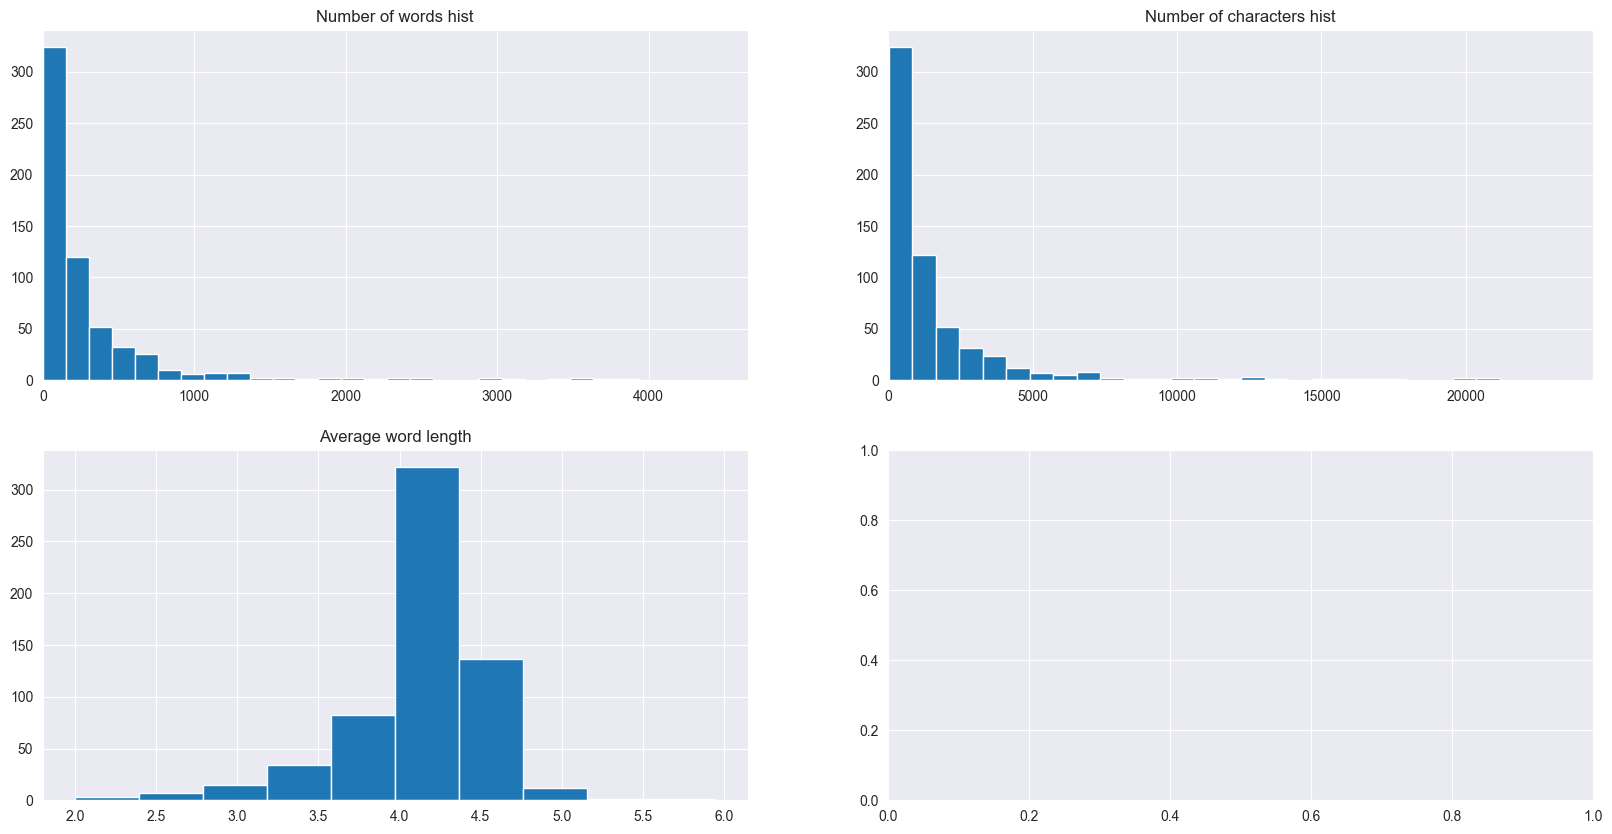

In [32]:
fig, ax = plt.subplots(2,2)
df_by_book["number_of_words"].hist(ax=ax[0,0], bins=100)
df_by_book["number_of_chars"].hist(ax=ax[0,1], bins=100)
ax[0,0].set_xlim(0,df_by_book["number_of_words"].quantile(0.99))
ax[0,1].set_xlim(0,df_by_book["number_of_chars"].quantile(0.99))
df_by_book["avg_word_length"].hist(ax=ax[1,0])
ax[0,0].set_title("Number of words hist")
ax[0,1].set_title("Number of characters hist")
ax[1,0].set_title("Average word length")


/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_37597/2851046541.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_processed, y=x_processed, ax=axes[0], palette="Blues_d")
/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_37597/2851046541.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_lemmatized, y=x_lemmatized, ax=axes[1], palette="Greens_d")


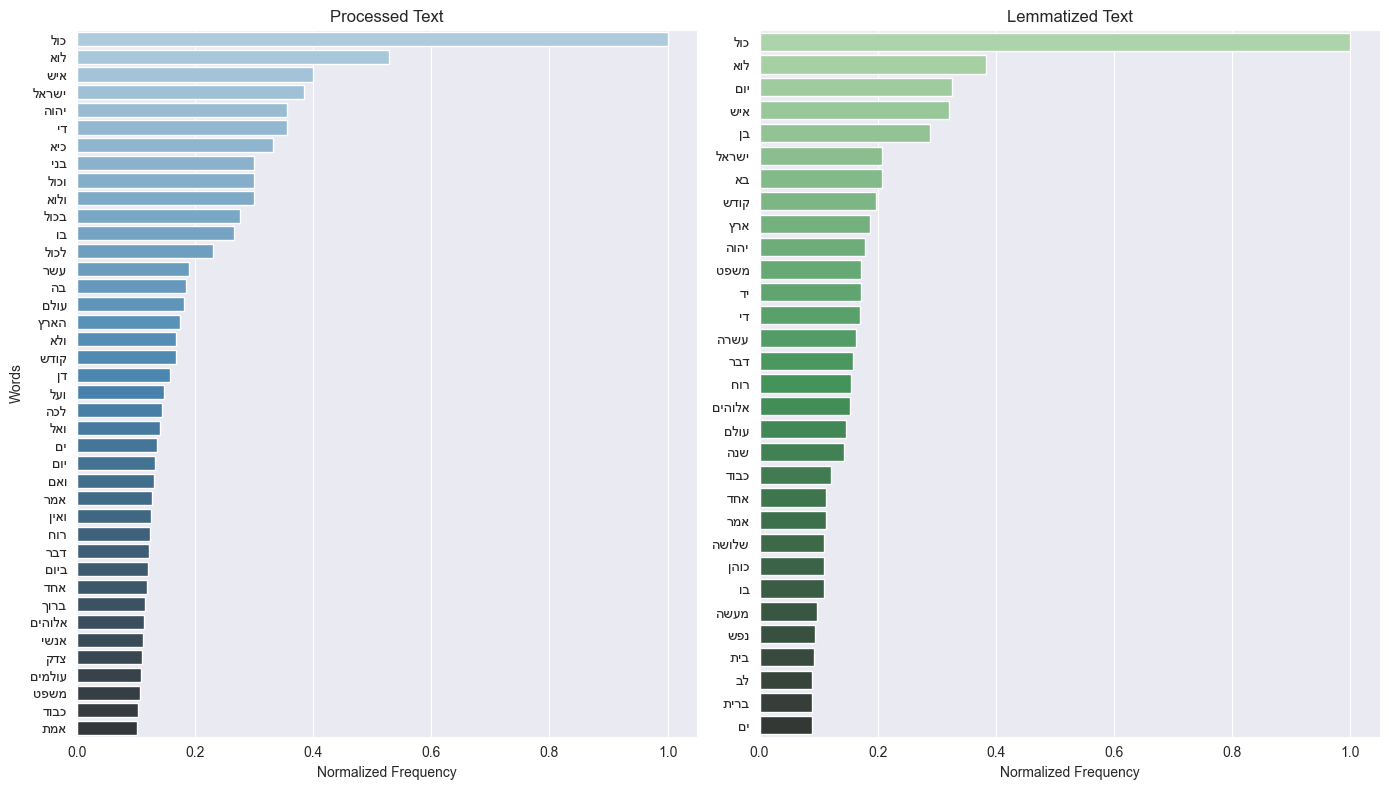

In [92]:
from collections import Counter
import seaborn as sns
def process_text(data, column_name):
    words = data[column_name].str.split()
    words = words.values.tolist()
    corpus = [word for i in words for word in i]
    counter = Counter(corpus)
    most = counter.most_common()

    x, y = [], []
    for word, count in most[:40]:
        if word not in stop_words:
            x.append(word[::-1])  # Reversing the word
            y.append(count)
    
    return x, y

# Process both columns
x_processed, y_processed = process_text(df_by_book, "processed_text")
x_lemmatized, y_lemmatized = process_text(df_by_book, "lemmatized_text")

# Normalize counts
y_processed = np.array(y_processed) / max(y_processed)
y_lemmatized = np.array(y_lemmatized) / max(y_lemmatized)

# Create subplots
fig, axes = plt.subplots(ncols=2, figsize=(14, 8), sharey=False)

sns.barplot(x=y_processed, y=x_processed, ax=axes[0], palette="Blues_d")
axes[0].set_title('Processed Text')
axes[0].set_xlabel('Normalized Frequency')
axes[0].set_ylabel('Words')

sns.barplot(x=y_lemmatized, y=x_lemmatized, ax=axes[1], palette="Greens_d")
axes[1].set_title('Lemmatized Text')
axes[1].set_xlabel('Normalized Frequency')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()